# Logistic Regression

## Juan Fernando González
201700085

## Lab No. 3  

### Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.optimize as op
from scipy.optimize import minimize, rosen, rosen_der
import matplotlib.pyplot as plt
%matplotlib inline

### File

In [2]:
filepath = r'dataset\\'
df = pd.read_csv(filepath + 'heart.csv')

### Dataframe Information

In [3]:
# First values of dataframe 

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Last values of dataset

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Sahpe of the dataframe

print(df.shape)

(303, 14)


In [6]:
# Null values 

print('----- NaN Values -----\n')
count_nan = len(df) - df.count()
count_nan

----- NaN Values -----



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print('   ----- Types -----\n')

df.dtypes

   ----- Types -----



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Let's see the attribute information, so we could understand better the data.

### Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target: 0 = No disease; 1 = Have disease

### Data Exploration

#### Unique values 

##### Age Column

In [9]:
# Unique values 

df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

##### Sex Column

In [10]:
# Unique values 

df.sex.unique()

array([1, 0], dtype=int64)

##### CP column

In [11]:
# Unique values 

df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

##### Trestbps column

In [12]:
# Unique values 

df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

##### Chol Column

In [13]:
# Unique values 

df.chol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

##### Fbs Column

In [14]:
# Unique values 

df.fbs.unique()

array([1, 0], dtype=int64)

##### Restecg Column

In [15]:
# Unique values 

df.restecg.unique()

array([0, 1, 2], dtype=int64)

##### Thalach Column

In [16]:
# Unique values 

df.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

##### Exang Column

In [17]:
# Unique values 

df.exang.unique()

array([0, 1], dtype=int64)

##### Oldpeak Column

In [18]:
# Unique values 

df.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

##### Slope Column

In [19]:
# Unique values 

df.slope.unique()

array([0, 2, 1], dtype=int64)

##### Ca Column

In [20]:
# Unique values 

df.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

##### Thal Column

In [21]:
# Unique values 

df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

##### Target Column

In [22]:
# Unique values 

df.target.unique()

array([1, 0], dtype=int64)

### Initiall Data visualization

#### Histogram for each feature

##### Age 

Text(0, 0.5, 'Frequency')

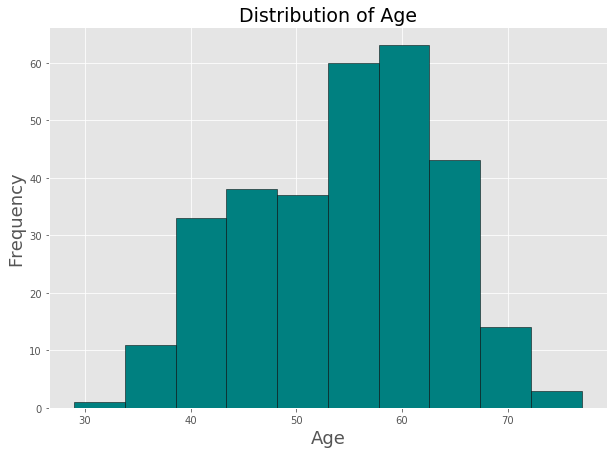

In [23]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.age.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Age', size=19)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18)

##### Sex 

Text(0, 0.5, 'Frequency')

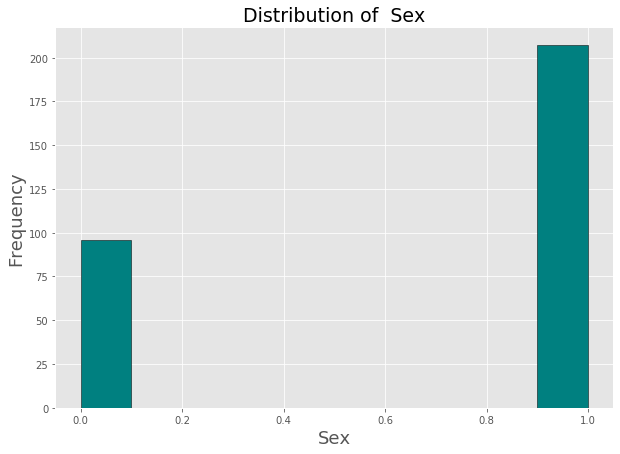

In [24]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.sex.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of  Sex', size=19)
plt.xlabel('Sex', size=18)
plt.ylabel('Frequency', size=18)

In [25]:
wo = len(df[df.sex == 0])
men = len(df[df.sex == 1])

In [26]:
print('Number of women: ', wo, '\n')
print('Number of men: ', men)

Number of women:  96 

Number of men:  207


##### CP 

Text(0, 0.5, 'Frequency')

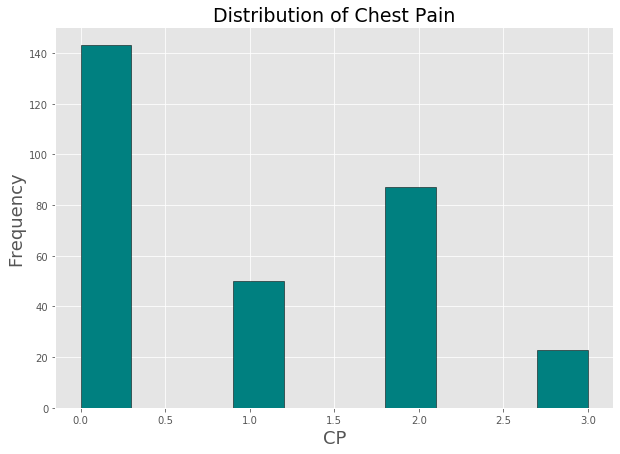

In [27]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.cp.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Chest Pain', size=19)
plt.xlabel('CP', size=18)
plt.ylabel('Frequency', size=18)

##### Trestbps 

Text(0, 0.5, 'Frequency')

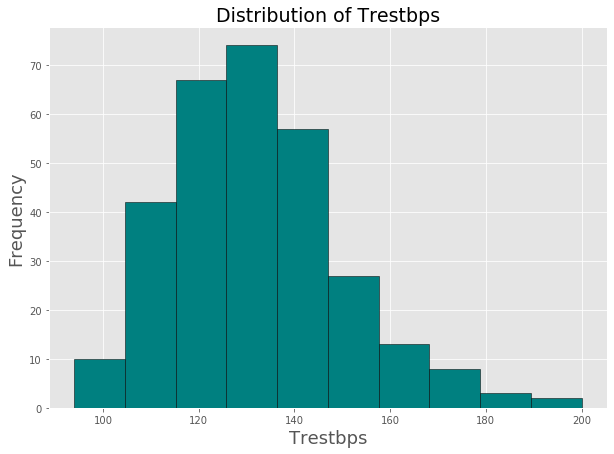

In [28]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.trestbps.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Trestbps', size=19)
plt.xlabel('Trestbps', size=18)
plt.ylabel('Frequency', size=18)

##### Chol

Text(0, 0.5, 'Frequency')

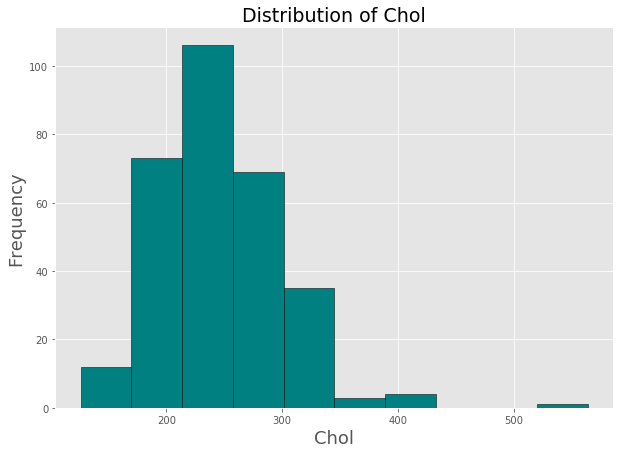

In [29]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.chol.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Chol', size=19)
plt.xlabel('Chol', size=18)
plt.ylabel('Frequency', size=18)

##### Fbs 

Text(0, 0.5, 'Frequency')

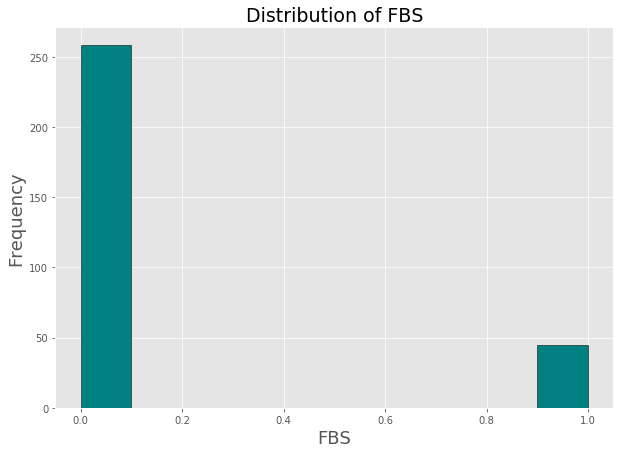

In [30]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.fbs.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of FBS', size=19)
plt.xlabel('FBS', size=18)
plt.ylabel('Frequency', size=18)

##### Restecg

Text(0, 0.5, 'Frequency')

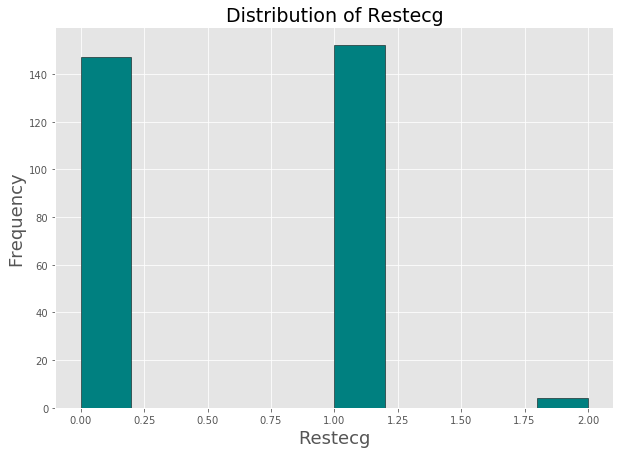

In [31]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.restecg.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Restecg', size=19)
plt.xlabel('Restecg', size=18)
plt.ylabel('Frequency', size=18)

##### Thalch

Text(0, 0.5, 'Frequency')

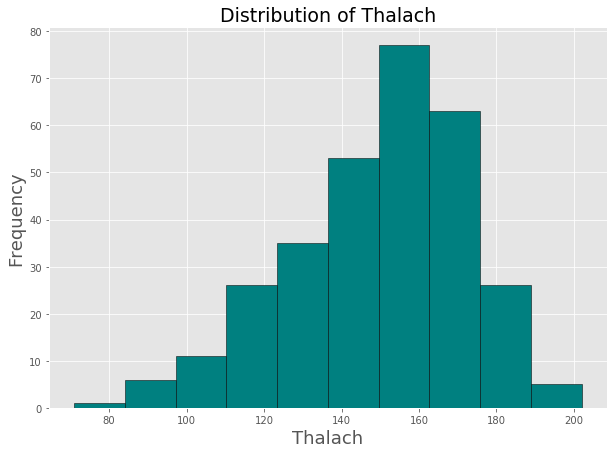

In [32]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.thalach.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Thalach', size=19)
plt.xlabel('Thalach', size=18)
plt.ylabel('Frequency', size=18)

##### Exang

Text(0, 0.5, 'Frequency')

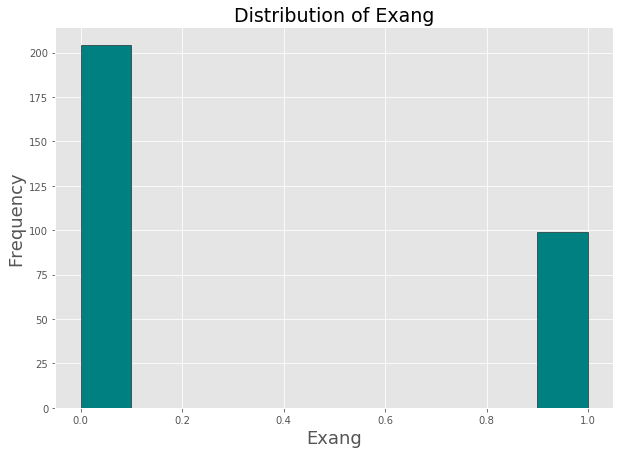

In [33]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.exang.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Exang', size=19)
plt.xlabel('Exang', size=18)
plt.ylabel('Frequency', size=18)

##### Old Peak

Text(0, 0.5, 'Frequency')

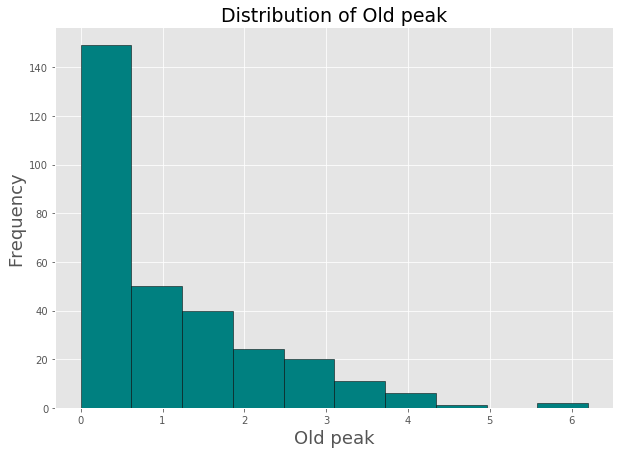

In [34]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.oldpeak.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Old peak', size=19)
plt.xlabel('Old peak', size=18)
plt.ylabel('Frequency', size=18)

##### Slope

Text(0, 0.5, 'Frequency')

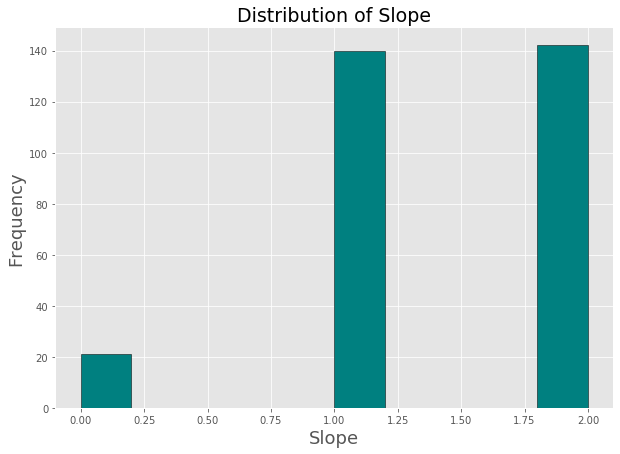

In [35]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.slope.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Slope', size=19)
plt.xlabel('Slope', size=18)
plt.ylabel('Frequency', size=18)

##### CA 

Text(0, 0.5, 'Frequency')

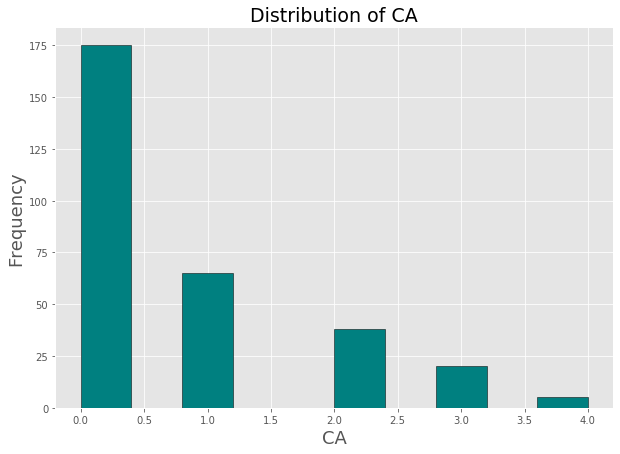

In [36]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.ca.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of CA', size=19)
plt.xlabel('CA', size=18)
plt.ylabel('Frequency', size=18)

##### Thal 

Text(0, 0.5, 'Frequency')

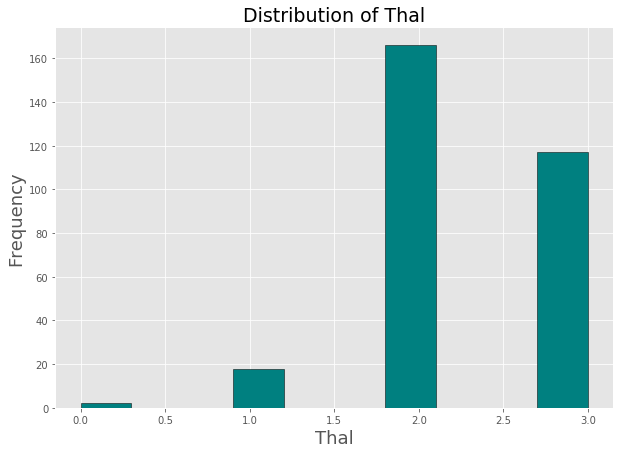

In [37]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.thal.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Thal', size=19)
plt.xlabel('Thal', size=18)
plt.ylabel('Frequency', size=18)

##### Target 

Text(0, 0.5, 'Frequency')

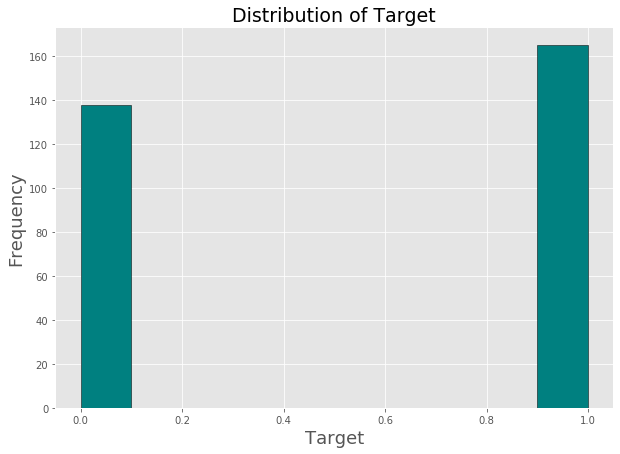

In [38]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram 
df.target.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Target', size=19)
plt.xlabel('Target', size=18)
plt.ylabel('Frequency', size=18)

In [39]:
NoD = len(df[df.target == 0])
HaveD = len(df[df.target == 1])

In [40]:
print('Persons that have no disease: ', NoD, '\n')
print('Persons that have disease: ', HaveD)

Persons that have no disease:  138 

Persons that have disease:  165


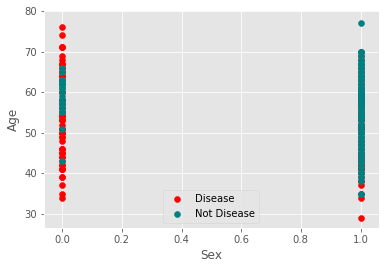

In [41]:
plt.scatter(x=df.sex[df.target==1], y=df.age[(df.target==1)], c="red")
plt.scatter(x=df.sex[df.target==0], y=df.age[(df.target==0)], c="teal")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

### Correlation

[Text(0.5, 1, 'Correlation')]

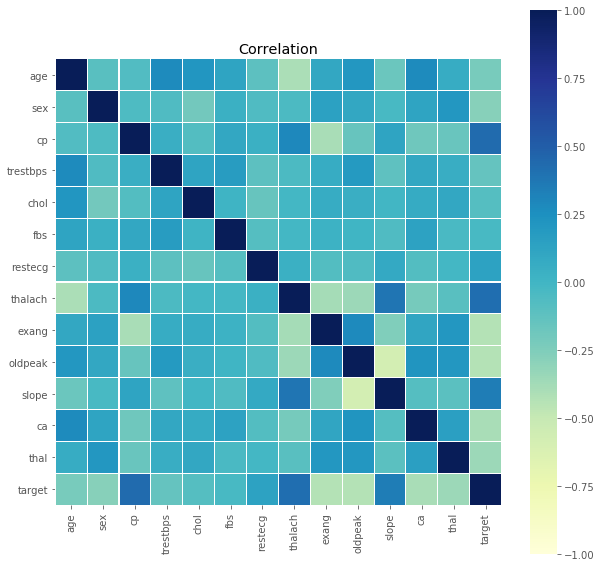

In [42]:
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, square=True, vmin=-1, vmax=1)
ax.set(title='Correlation')

Target, have a strong relationship with Slope, thalanch and chest pain. 

### Logistic Regression functions 

#### Cost Function

In [43]:
def cost(theta, X, y):
    
    '''
    Calculates the cost for given X and Y. 

    theta:
        Vector.
    x:
        Row vector 
    y: 
        Vector

    pred: 
        # h(theta), Nos da todas las hipotesis
    '''
    
    m = len(y)
    
    # Sigmoide
    
    h = ((1)/(1 + np.exp(-(np.dot(X, theta)))))
    
    
    j_p1 = (y * np.log(h))
    
    j_p2 = ((1 - y) * np.log(1 - h))
    
    
    j = ((-1/(m)) * np.sum(j_p1 + j_p2))
    
    
    return j

#### Cost Function Optimized

In [44]:
def cost_op(theta, X, y):
    
    '''
    Calculates the cost for given X and Y. 

    theta:
        Vector.
    x:
        Row vector 
    y: 
        Vector

    pred: 
        # h(theta), Nos da todas las hipotesis
    '''
    
    theta = theta.reshape(len(theta), 1)
    
    m = len(y)
    
    # Sigmoide
    
    h = ((1)/(1 + np.exp(-(np.dot(X, theta)))))
    
    
    j_p1 = (y * np.log(h))
    
    j_p2 = ((1 - y) * np.log(1 - h))
    
    
    j = ((-1/(m)) * np.sum(j_p1 + j_p2))
    
    
    return j.flatten()

#### Logistic Regression Function

In [45]:
def logistic_r(theta, x, y, alpha, max_it):
    '''
    theta, X_vStack, Y, alpha, max_it
    Returns the final theta vector.

    alpha: 
        Learning rate
    X:
        Matrix of X with added bias.
        dim :
            m,2
    Y: 
        Vector of Y

    theta:
        dim: 
            m,1 
    '''

    m = len(y)

    cost_history = np.zeros(max_it)

    for i in range(max_it):

        h = 1 / (1 + np.exp((-(np.dot(x, theta)))))

        #theta = ((1 / m) * (x.T.dot((h - y))))
        theta = ((1 / m) * ((x.T).dot((h - y))))
        
        #print(theta)
        #cost_history[i] = cost(theta, x, y)
        

    return theta, cost_history

#### Logistic Regression Function Optimization

In [46]:
def logistic_r_op(theta, X, y):
    '''
    theta, X_vStack, Y, alpha, max_it
    Returns the final theta vector.

    alpha: 
        Learning rate
    X:
        Matrix of X with added bias.
        dim :
            m,2
    Y: 
        Vector of Y

    theta:
        dim: 
            m,1 
    '''

    m = len(y)
    
    theta = theta.reshape(len(theta), 1)    
    
    max_it = 1000

    for i in range(max_it):

        h = 1 / (1 + np.exp((-(np.dot(X, theta)))))

        theta = ((1 / m) * (X.T.dot((h - y))))
        

    return theta.flatten()

#### Data Input

In [47]:
X1 = np.array(df['slope'])[np.newaxis].T

X1.shape

(303, 1)

In [48]:
X2 = np.array(df['thalach'])[np.newaxis].T

X2.shape

(303, 1)

### Normalize data

In [49]:
# Normalize

norma = preprocessing.MinMaxScaler()
X1_scaled = norma.fit_transform(X1)
df_normalized_X1 = pd.DataFrame(X1_scaled)
df['Norm_slope'] = df_normalized_X1 

X1_scaled.shape

(303, 1)

In [50]:
# Normalize

norma = preprocessing.MinMaxScaler()
X2_scaled = norma.fit_transform(X2)
df_normalized_X2 = pd.DataFrame(X2_scaled)
df['Norm_thalach'] = df_normalized_X2 

X2_scaled.shape

(303, 1)

##### X's and Y's

In [51]:

names = ['age', 'thalach']
X_o = df[names]

Ys = df.target.values
Y = np.array(Ys).reshape(len(Ys), 1)

In [52]:
X_o.head()

,age,thalach
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163


In [53]:
X_o.shape

(303, 2)

In [54]:
X_o.astype(int)

,age,thalach
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163
...,...,...
298,57,123
299,45,132
300,68,141
301,57,115


In [55]:
Y.shape

(303, 1)

In [56]:
Y.astype(int)

type(Y)

numpy.ndarray

### One Hot Encoding

In [57]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [58]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [59]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [60]:
y_s = df.target.values
x_data = df.drop(['target'], axis = 1)

In [61]:
# Normalize 

x_s = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

## Algorithm Input

#### Model No. 1 (Slope & thalach)

In [62]:
alpha = 0.01
max_it = 100

X_vStack = np.c_[np.ones((len(X1), 1)), X1, X2]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

#gd, cost_history  = logistic_r(X_vStack, Y, theta, alpha, max_it)

gd, cost_history  = logistic_r(theta, X_vStack, Y, alpha, max_it)

print('Theta: \n', gd)

Theta: 
 [[ 0.45544554]
 [ 0.53135314]
 [63.35313531]]


#### Model No. 2 with normalized features (Slope & thalach)

In [63]:
alpha = 0.01
max_it = 100

X_vStack = np.c_[np.ones((len(X1_scaled), 1)), X1_scaled, X2_scaled]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

#gd, cost_history  = logistic_r(X_vStack, Y, theta, alpha, max_it)

gd, cost_history  = logistic_r(theta, X_vStack, Y, alpha, max_it)

print('Theta: \n', gd)

Theta: 
 [[-0.11115208]
 [-0.13441539]
 [-0.10486455]]


In [64]:
dataset = (X_vStack, Y)

result = op.minimize(
    fun=cost_op,
    x0=theta.flatten(),
    args= dataset, 
    method='Newton-CG',
    jac=logistic_r_op
)

print(result)

     fun: array([0.82135632])
     jac: array([-0.11115208, -0.13441539, -0.10486455])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 0
     nit: 1
    njev: 4
  status: 0
 success: True
       x: array([0.66577388, 0.66633266, 0.52861354])


#### Model No. 3 (Age & THALACH)

In [65]:
alpha = 0.01
max_it = 100

X_vStack = np.c_[np.ones((len(X_o), 1)), X_o]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

#gd, cost_history  = logistic_r(X_vStack, Y, theta, alpha, max_it)

gd, cost_history  = logistic_r(theta, X_vStack, Y, alpha, max_it)

print('Theta: \n', gd)

Theta: 
 [[ 0.45544554]
 [25.77887789]
 [63.35313531]]


#### Model No. 4

In [67]:
alpha = 0.01
max_it = 100

X_vStack = np.c_[np.ones((len(x_s), 1)), x_s]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

gd, cost_history  = logistic_r(theta, X_vStack, y_s, alpha, max_it)

print('Theta: \n', gd)

Theta: 
 [[-0.98871151 -0.98871151 -0.98871151 ...  0.98871151  0.98871151
   0.98871151]
 [-0.5224882  -0.5224882  -0.5224882  ...  0.5224882   0.5224882
   0.5224882 ]
 [-0.67691306 -0.67691306 -0.67691306 ...  0.67691306  0.67691306
   0.67691306]
 ...
 [-0.06774254 -0.06774254 -0.06774254 ...  0.06774254  0.06774254
   0.06774254]
 [-0.45630739 -0.45630739 -0.45630739 ...  0.45630739  0.45630739
   0.45630739]
 [-0.46466158 -0.46466158 -0.46466158 ...  0.46466158  0.46466158
   0.46466158]]


#### Model No. 4 with optimization function

In [68]:
dataset = (X_vStack, Y)

result = op.minimize(
    fun=cost_op,
    x0=theta.flatten(),
    args= dataset, 
    method='Newton-CG',
    jac=logistic_r_op
)

print(result)

     fun: array([1.81829793])
     jac: array([-0.40424646, -0.19090741, -0.21133547, -0.13084288, -0.10590444,
       -0.05531714, -0.12627975, -0.2841938 , -0.021876  , -0.02305955,
       -0.02215771, -0.34695602, -0.2841938 , -0.05194801, -0.11646445,
       -0.19391429, -0.04191971, -0.00218883, -0.00868535, -0.36602341,
       -0.02734887, -0.01585558, -0.08286972, -0.30552116])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 0
     nit: 1
    njev: 4
  status: 0
 success: True
       x: array([0.35495347, 0.70083699, 0.14858384, 0.30913815, 0.07254223,
       0.0558028 , 0.93485833, 0.12859429, 0.18589449, 0.92390021,
       0.86246506, 0.35073622, 0.71027607, 0.92947196, 0.85063694,
       0.13528256, 0.34166396, 0.88433485, 0.25301176, 0.19606666,
       0.35620625, 0.69204639, 0.25436391, 0.5047522 ])


#### Plot

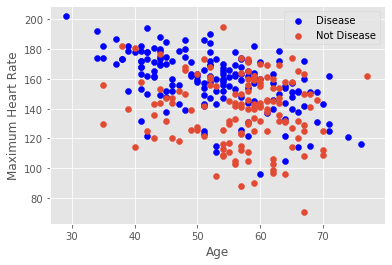

In [74]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="blue")
y = gd[0] + gd[1] * X1 + gd[2]
x1 = -((gd[0] + gd[2] * X2) / gd[1])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Conclusion

As we could see, the last model with optimization functions, was the best model to our Logistic Regression and for our dependient variable Target. It have a very low number of iterations and very low cost. In the other hand, the second model also have a very low number of iterations and very low cost too, but the variables does not have a strong relationship with the Target variable. And as a final conclusion we can say that the optimization functions made our model so accurate and efficient, so its a nice to have in a model, but we need to understand what is happending. 

In [ ]:
"""
plt.scatter(X1, X2)
y = gd[0] + gd[1] * X1 + gd[2]
x1 = -((gd[0] + gd[2] * X2) / gd[1])
plt.plot(x1 ,X2, '-r')
plt.xlabel("$X$", fontsize=12)
plt.ylabel("$Y$", fontsize=12)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
plt.show()
"""